# Clearing the Confusion Once And For All: args, kwargs, and asterisks in Python
## and living happily ever after
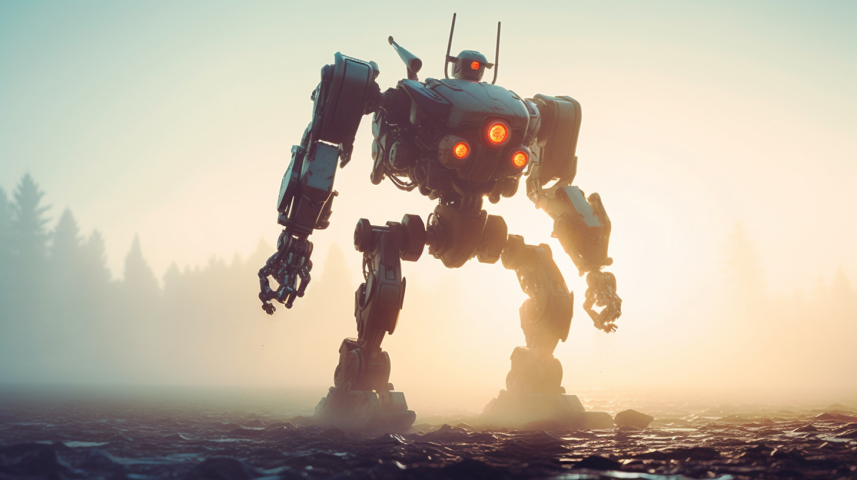

### Motivation

I've always felt annoyed when I saw someone using \*args, \*\*kwargs in functions or the  asterisk operator for any other purpose than multiplication. I mean, couldn't they stop being arrogant for just a second and use something readable to everyone else?

But after learning what they were, I realized that the use of __\*args__, __\*\*kwargs__ and the prefix asterisk comes from a desire for flexibility and elegance. Even though it may feel like a slap in the Zen of Python's face, which says "Readability counts", they are powerful tools for beautiful code.

So, in this article, I promise to clear any and all confusion surrounding these cryptic keywords and starry expressions and show you almost all the scenarios you can use them.

Let's get started.

### Unpacking iterables

When the asterisk is used between two variables or Python objects, it is usually for multiplication or exponentiation. But, when used _before_ variables or iterable objects, it turns into a totally different beast.

> An iterable is a Python that you can iterate over such a string, tuple, list, dictionary, set, 

By putting an asterisk in front of any iterable or a variable holding an iterable, you can break apart (unpack) all its elements.

Exhibit A:

In [18]:
breakable_list = list(range(25))

print(*breakable_list)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24


Notice how printing an unpacked iterable isn't the same as printing it on its own:

In [23]:
print(breakable_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


The difference is that in the first `print` call, we passed all the elements of a list to `print` as _individual arguments_ (25 in fact). In the second one, we are passing the list as a whole - as a single argument to `print`.

So, scenario zero - use iterable unpacking to pass all elements of an iterable as individual arguments to some function.

Exhibit B with strings:

In [40]:
string = "Readability counts"

print(*string)

R e a d a b i l i t y   c o u n t s


With loops, it would have went like this:

In [30]:
for s in string:
    print(s, end=" ")

R e a d a b i l i t y   c o u n t s 

We will see more variants of this scenario later.

### Dictionary unpacking

Scenario one - use the double asterisk \*\* operator to unpack dictionaries (only dictionaries).

This scenario has many variants, too. One of them is passing dictionary items as keyword arguments into functions. 

For example, consider the following `author` dictionary which contains the exact same keys as the arguments of the `pretty_print` function:

In [54]:
author = {"name": "Bex", "n_followers": 17000, "happy": True}


def pretty_print(name, n_followers, happy):
    print(
        f"{name} has {n_followers} followers and "
        f"he is {'happy' if True else 'unhappy'}!"
    )

To pass the contents of `author` into `pretty_print`, we would have to write this ugly piece of code:

In [56]:
pretty_print(
    name=author["name"],
    n_followers=author["n_followers"],
    happy=author["happy"],
)

Bex has 17000 followers and he is happy!


But we don't have to; we can just use double asterisks to unpack the items:

In [42]:
pretty_print(**author)

Bex has 17000 followers and he is happy!


These two scenarios are enough to understand `args` and `kwargs`.

### Positional vs. keyword arguments

One last thing before that - let's quickly recap the differences between positional and keyword arguments in Python functions so there won't be any confusion or name-calling later. 

One sentence summary of the differences: positional arguments love order while keyword arguments love explicitness. 

Let's look at a function with four arguments for further differences:

In [61]:
def total_price(
    price: float,
    quantity: int,
    discount=0,
    tax_rate=0,
):
    # The rest of the code
    ...

Positional arguments:

1. Don't have a default value like `price` and `quantity`.
2. Can't be skipped. You should always provide values to them when calling functions.
3. Require order. You can't switch two positionals if you want to make sense or avoid nasty errors.
4. Don't care about names. They care about the position.
5. Keeps function definitions short and sweet.
6. Can be hard to understand especially when dealing with many-argument functions.

On the other hand, keyword arguments:
1. Always have a default value, which means you can skip them when calling functions.
2. Don't care about the order. You can pick and choose any one of them at any time irrespective of the order they were defined in the function signature.
3. Offer precision and clarity. Lets you explicitly specify which argument corresponds to which parameter.
4. Enhance function documentation. They are mini-labels of what they do.

See [this discussion](https://stackoverflow.com/questions/9450656/positional-argument-vs-keyword-argument) for more details.

### Unknown number of positional arguments

There is a common case of Python functions that don't know how many positional arguments they require. For example, consider this one that calculates the geometric average of three numbers:

In [72]:
def geometric_average(a, b, c):
    product = a * b * c
    geometric_avg = product ** (1 / 3)

    return geometric_avg

In [73]:
geometric_average(5, 9, 8)

7.113786608980125

What happens if you want to generalize to four numbers? Or five? Or six? You know where I am going with this...

What we want is a function that calculates the geometric average of as many numbers as we want. 

So, here is the second scenario of the asterisk operator: defining functions that accept undefined number of positional arguments.

In [80]:
def geometric_average(*args):
    print("That works.")

You enter the second scenario by putting `*args` into a function definition, allowing you to pass however many values without raising any errors:

In [81]:
geometric_average(1, 2, 3, 4, 5, 6)

That works.


But what does `*args` actually mean? 

Under the hood, when we passed the six numbers separated by commas to `geometric_average`, `*args` collected them into a tuple:

In [78]:
def geometric_average(*args):
    print(type(args))


geometric_average(2, 1)

<class 'tuple'>


> So, in this scenario, we are performing packing, rather than _unpacking_. 

OK, since `args` is now a regular tuple, we can iterate over its elements and finish the rest of the function:

In [87]:
def geometric_average(*args):
    product = 1
    for num in args:
        product *= num
    geometric_avg = product ** (1 / len(args))

    return geometric_avg


geometric_average(2, 3, 5, 6, 1)

2.825234500494767

Using the keyword `args` is not a rule but only a convention. In fact, you can change it to a more readable word like `numbers`:

In [88]:
def geometric_average(*numbers):
    product = 1
    for num in numbers:
        product *= num
    geometric_avg = product ** (1 / len(numbers))

    return geometric_avg

### Unknown number of keyword arguments

The next (third) scenario is when a function can accept an arbitrary number of keyword arguments. And you guessed it, this is where `**kwargs` come in:

In [90]:
def pickle_model(model_object, path, **kwargs):
    "A function to pickle an ML model"
    ...

`pickle_model` saves machine learning models to disk in pickle format. It has two required positional arguments for the model object itself and the path to save it.

Optionally, the user can pass whatever additional information about the model like hyperparameter values, the version number, model author, etc.

```python
pickle_model(
    xgb_regressor,
    "models/xgb_regressor.pkl",
    hyperparameters={"max_depth": 3, "eta": 1},
    author="bexgboost",
    version="v1.0.1",
)
```

and there wouldn't be any errors.

Like `args`, `kwargs` is a name you can change to just about anything else:

In [97]:
def pickle_model(model_object, path, **metadata):
    "A function to pickle an ML model"
    print(type(metadata))

```python
pickle_model(xgb_regressor, "models/xgb_reg.pkl", author="bexgboost")
```

```
<class 'dict'>
```

But unlike `args`, `kwargs` is a dictionary. This means you can access its contents either through a look-up (this can lead to errors) or iterating with `.items()`:

In [102]:
def pickle_model(model_object, path, **metadata):
    "A function to pickle an ML model."
    # Raises an error if author is not given so use `get()`
    author = metadata["author"]

    # Iterate
    for key, value in metadata.items():
        ...

### The order of everything

There are a few rules you must follow when mixing arguments in both function signatures and calls:

0. Positional arguments always come first.

In [104]:
def func(arg1, arg2, *args, **kwargs):
    pass

1. Positional arguments can't be skipped (already said that).
2. `*args` and `**kwargs` can be skipped entirely when calling functions:

In [105]:
func(1, 2)

In that case, `args` will be an empty list and `kwargs` will be an empty dictionary.

3. All types of arguments can be stand-alone, meaning you don't have to have a mix of arguments for a function:

In [107]:
# Only args itself
def func(*args):
    ...

4. You can't pass positional arguments after keyword arguments:

In [112]:
def func(arg1, arg2, hello="it's me", arg3):
    pass

SyntaxError: non-default argument follows default argument (2730392363.py, line 1)

5. `*args` must always come after positional arguments and before keyword arguments.
6. `*kwargs` should always be the last one.

### The grand scenario

Even though not very grand, it is a handy trick introduced in latest versions of Python. Consider this function signature:

In [113]:
def weird(arg, arg_again, *, default=1):
    pass

Right in the middle of everything, we see an asterisk standing on its own, not attached to anything. What does it mean?

This asterisk-on-its-own syntax forces you to use keyword arguments _explicitly_ all the time. For example, let's define `weird` without the asterisk and call it:

In [117]:
def weird(arg, arg_again, default=1):
    pass


weird(1, 2, 3)

No errors. For `default`, we passed 3 but didn't write `default=3` to make the call shorter.

Now, let's try the same with asterisk present:

In [118]:
def weird(arg, arg_again, *, default=1):
    pass


weird(1, 2, 3)

TypeError: weird() takes 2 positional arguments but 3 were given

We get a `TypeError`! It is telling us that we passed one too many positional arguments. In other words, we must use the following syntax:

In [119]:
weird(1, 2, default=3)

Now, it is error-free again. This syntax was introduced to make function calls more readable, especially for functions and classes that accept many arguments.

Sklearn widely adopted this feature in its recent versions. For example, here is the docs for `RandomForestRegressor`:

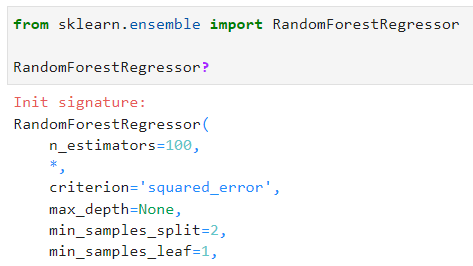

In the past, certain pros would just write code like:

```python
rf = RandomForestRegressor(1000, 'squared_error', 3, 3, 2)
```

And a person who hadn't memorized the docs would be left baffled upon reading it. But with the addition of the asterisk, all keyword arguments after `n_estimators` must be explicitly specifed:

In [124]:
rf = RandomForestRegressor(
    1000,  # No need for n_estimators=1000
    criterion="poisson",
    max_depth=3,
    min_samples_split=3,
    min_samples_leaf=2,
)

### Various tricks with unpacking

Asterisk unpacking can be used in many ways other than functions signatures and calls. In this section, I will list a few of them without going too much into the details.

0. Merging two iterables:

In [125]:
a = [1, 2, 3]
b = [4, 5, 6]

x_dict = {"a": 1, "b": 0}
y_dict = {"c": 10, "d": 10}

In [126]:
[*a, *b]

[1, 2, 3, 4, 5, 6]

In [127]:
{**x_dict, **y_dict}

{'a': 1, 'b': 0, 'c': 10, 'd': 10}

1. Extending iterables

In [129]:
a = [1, 2, 3]
b = [*a, "c", "d", "n"]

b

[1, 2, 3, 'c', 'd', 'n']

2. Formatting strings with dictionary items

In [134]:
employee_info = {"name": "John Doe", "age": 35, "position": "Manager"}

message = (
    "Employee Name: {name}\nAge: "
    "{age}\nPosition: {position}".format(**employee_info)
)
print(message)

Employee Name: John Doe
Age: 35
Position: Manager


3. Unpacking into variables

In [135]:
# Unpack all elements of a set one-by-one
a, b, c = {1, 2, 3}

# Unpack into varied length arguments
first, *remaining, last = [1, 2, 3, 4, 5]

print(first, remaining, last)

1 [2, 3, 4] 5


4. Discarding values

In [138]:
first, second, *_ = [1, 2, 3, 4, 5]

print(first, second)

1 2


5. Unpacking nested lists

In [139]:
nested_list = [1, [2, 3], 4]

a, (b, c), d = nested_list

print(b, c)

2 3


6. Transposing a list of lists (a matrix)

In [131]:
def transpose(list_of_lists):
    return [list(row) for row in zip(*list_of_lists)]


my_list = [[1, 4, 7], [2, 5, 8], [3, 6, 9]]
print(my_list)

[[1, 4, 7], [2, 5, 8], [3, 6, 9]]


In [132]:
transpose(my_list)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

I'd like you to pause and ponder why each of these examples work without errors, especially the ones that don't even involve the asterisk operator like the fifth one.

Do you know any other trick yourself? Don't be shy - share it in the comments.

### Confusion

The quirkiness of Python knows no bounds and the use of asterisks along with `args` and `kwargs` is certainly an example of this. 

The key is to embrace this quirkiness and move past the initial discomfort for they can be great tools in making your code more elegant, readable and of course, a bit weird.

Thank you for reading!

-------

Loved this article and, let's face it, its bizarre writing style? Imagine having access to dozens more just like it, all written by a brilliant, charming, witty author (that's me, by the way :).

For only 4.99$ membership, you will get access to not just my stories, but a treasure trove of knowledge from the best and brightest minds on Medium. And if you use [my referral link](https://ibexorigin.medium.com/membership), you will earn my supernova of gratitude and a virtual high-five for supporting my work.

https://ibexorigin.medium.com/membership